In [1]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.0)
mpl.rcParams['figure.figsize'] = 10, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Polynomial Curve Fitting

### Define the True Function and Generate the Sample Data

In [3]:
def f(x):
    return math.sin(x)
print f(math.pi / 2)

1.0


In [4]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

In [5]:
num_points = 10

In [6]:
train = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
train['y'] = train.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

In [7]:
test = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
test['y'] = test.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

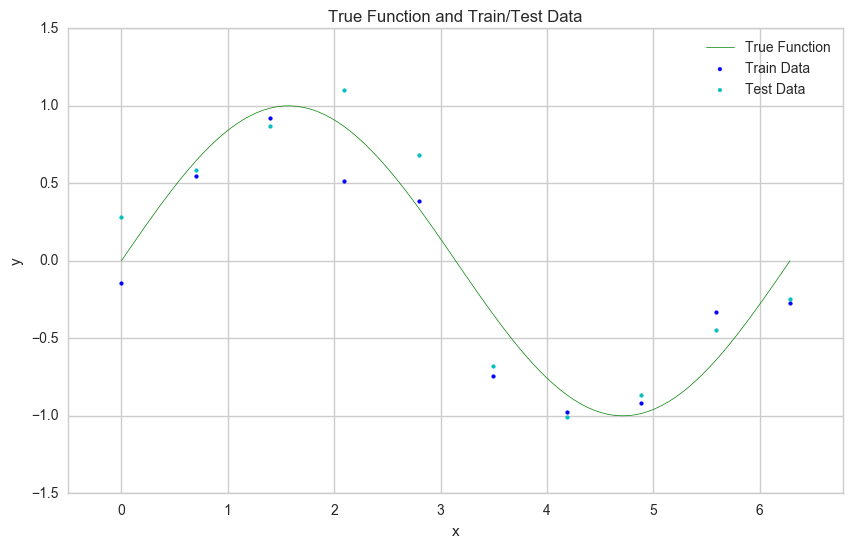

In [8]:
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.5, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=7, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=7, label='Test Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Train/Test Data')
_ = plt.legend()

### Implement Polynomial Curve Fitting

In [9]:
def error(x, y, poly):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s

In [10]:
def regularized_error(x, y, poly, reg_coeff):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s + 0.5 * reg_coeff * np.dot(poly, poly)

### Degree = 1

 
-0.1922 x + 0.5015

error on train:       1.26141074147
reg. error on train:  1.26285285685
error on test:        1.59814445868
reg. error on test:   1.59958657406


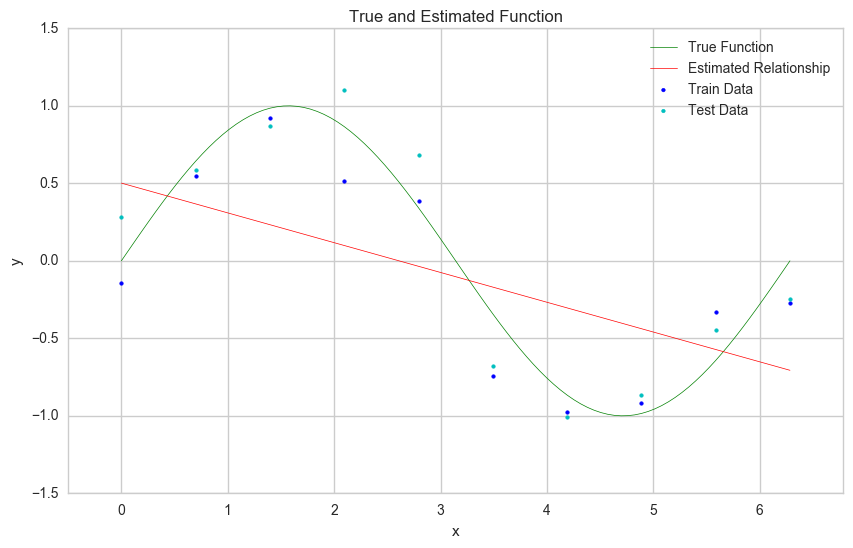

In [11]:
degree = 1
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print poly
print

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.5, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=7, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=7, label='Test Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.5, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()

### Degree = 3

         3          2
0.07467 x - 0.6979 x + 1.448 x - 0.1041

error on train:       0.262154718751
reg. error on train:  0.275160629156
error on test:        0.538817321153
reg. error on test:   0.551823231558


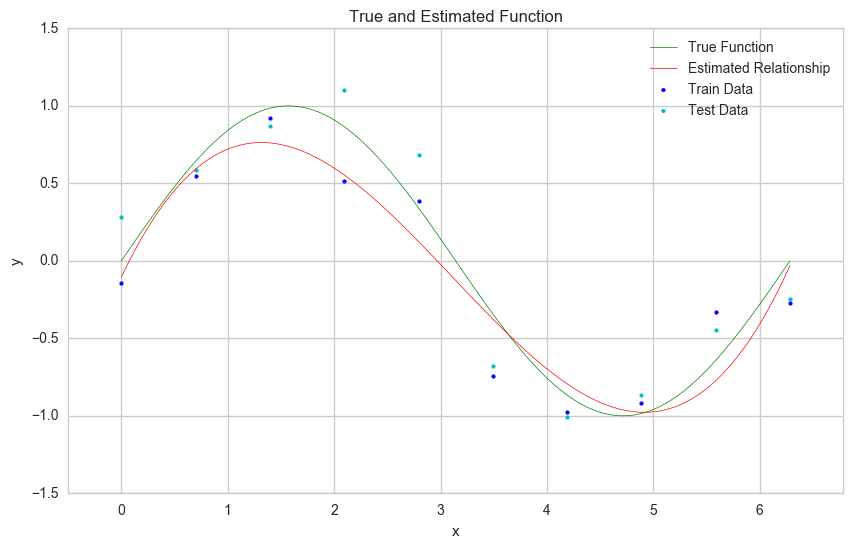

In [12]:
degree = 3
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print poly
print

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.5, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=7, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=7, label='Test Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.5, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()

### Degree = 9

           9          8         7         6         5         4
-0.005254 x + 0.1499 x - 1.797 x + 11.76 x - 45.57 x + 106.1 x
          3         2
 - 143.3 x + 100.4 x - 26.31 x - 0.1406

error on train:       4.91511416698e-19
reg. error on train:  223.975740673
error on test:        0.320828624529
reg. error on test:   224.296569298


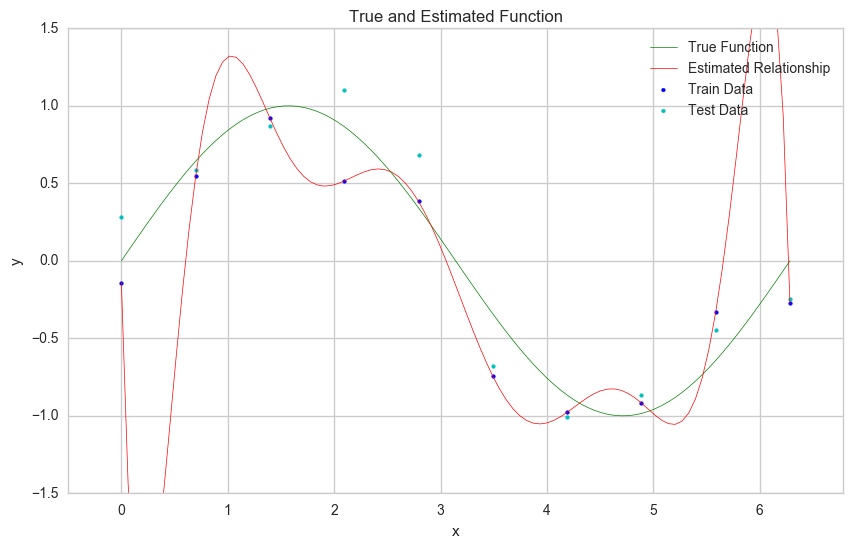

In [13]:
degree = 9
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print poly
print

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.5, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=7, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=7, label='Test Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.5, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend()

### Error as a Function of Degree

In [14]:
degrees = range(10)
reg_coeff = 0.01
train_errors = []
train_reg_errors = []
test_errors = []
test_reg_errors = []
for i in degrees:
    pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
    poly = np.poly1d(np.polyfit(train.x.values, train.y.values, i))
    pred['y'] = pred.x.apply(poly)
    train_errors.append(error(train.x.values, train.y.values, poly))
    train_reg_errors.append(regularized_error(train.x.values, train.y.values, poly, reg_coeff))
    test_errors.append(error(test.x.values, test.y.values, poly))
    test_reg_errors.append(regularized_error(test.x.values, test.y.values, poly, reg_coeff))

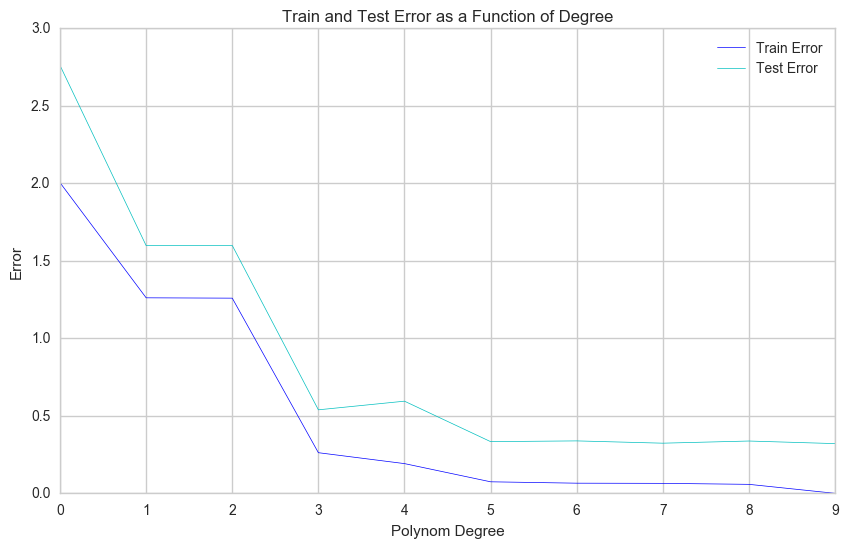

In [15]:
_ = plt.plot(degrees, train_errors, 'b-', linewidth=0.5, label='Train Error')
_ = plt.plot(degrees, test_errors, 'c-', linewidth=0.5, label='Test Error')
_ = plt.xlabel('Polynom Degree')
_ = plt.ylabel('Error')
_ = plt.title('Train and Test Error as a Function of Degree')
_ = plt.legend()

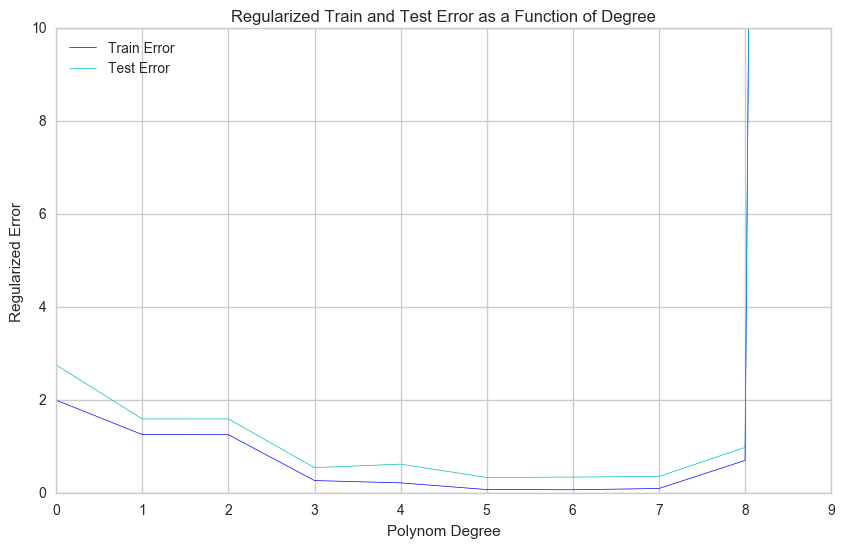

In [16]:
_ = plt.plot(degrees, train_reg_errors, 'b-', linewidth=0.5, label='Train Error')
_ = plt.plot(degrees, test_reg_errors, 'c-', linewidth=0.5, label='Test Error')
_ = plt.xlim((0, 9))
_ = plt.ylim((0, 10))
_ = plt.xlabel('Polynom Degree')
_ = plt.ylabel('Regularized Error')
_ = plt.title('Regularized Train and Test Error as a Function of Degree')
_ = plt.legend(loc='upper left')